In [1]:
!pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

##############
file_name='d.MC_results/S3_MC_results.csv'
df = pd.read_csv(file_name, encoding="UTF-8").copy()
df['Node'] = df['Node'].map(lambda x : 'Node '+str(x))
df.rename(columns={'1':'probability (100s elapsed)', '2':'probability (200s elapsed)', '3':'probability (300s elapsed)', '4': 'probability (400s elapsed)'}, inplace=True)
first_slice=df[['Node', 'probability (100s elapsed)']]
second_slice=df[['Node', 'probability (200s elapsed)']]
third_slice=df[['Node', 'probability (300s elapsed)']]
fourth_slice = df[['Node', 'probability (400s elapsed)']]
df

,Node,probability (100s elapsed),probability (200s elapsed),probability (300s elapsed),probability (400s elapsed)
0,Node 1,0.0,0.0,0.00,0.000
1,Node 2,0.0,0.0,0.00,0.000
2,Node 3,0.0,0.0,0.00,0.000
3,Node 4,0.0,0.0,0.00,0.000
4,Node 5,0.0,0.0,0.00,0.000
...,...,...,...,...,...
60,Node 61,0.0,0.0,1.99,4.116
61,Node 62,0.0,0.0,0.00,0.000
62,Node 63,0.0,0.0,0.00,0.000
63,Node 64,0.0,0.0,0.00,0.217


In [3]:
##############
file_name = "d.smokedetector_t/1381_smokep_avg.csv"
sd=pd.read_csv(file_name, encoding='UTF-8')
sd_df=sd.copy()
sd_df=sd_df.fillna(0)
sd_df

,Unnamed: 0,100s,200s,300s,400s
0,Node 1,0.000000,1.155070e-04,0.003130,0.013085
1,Node 2,0.000000,1.058370e-04,0.002890,0.012830
2,Node 3,0.000000,1.600000e-07,0.000877,0.007171
3,Node 4,0.000000,8.540000e-07,0.000983,0.007326
4,Node 5,0.000000,4.370090e-05,0.002080,0.010011
...,...,...,...,...,...
60,Node 61,0.000016,1.218261e-03,0.005807,0.013736
61,Node 62,0.000000,4.958180e-04,0.004272,0.011493
62,Node 63,0.000000,6.276650e-04,0.004688,0.012775
63,Node 64,0.000006,8.601080e-04,0.004551,0.011397


In [4]:
sd_df = sd_df.rename(columns = {'Unnamed: 0' : 'Node'})
sd_df

,Node,100s,200s,300s,400s
0,Node 1,0.000000,1.155070e-04,0.003130,0.013085
1,Node 2,0.000000,1.058370e-04,0.002890,0.012830
2,Node 3,0.000000,1.600000e-07,0.000877,0.007171
3,Node 4,0.000000,8.540000e-07,0.000983,0.007326
4,Node 5,0.000000,4.370090e-05,0.002080,0.010011
...,...,...,...,...,...
60,Node 61,0.000016,1.218261e-03,0.005807,0.013736
61,Node 62,0.000000,4.958180e-04,0.004272,0.011493
62,Node 63,0.000000,6.276650e-04,0.004688,0.012775
63,Node 64,0.000006,8.601080e-04,0.004551,0.011397


#### Pearson 상관계수

<Axes: >

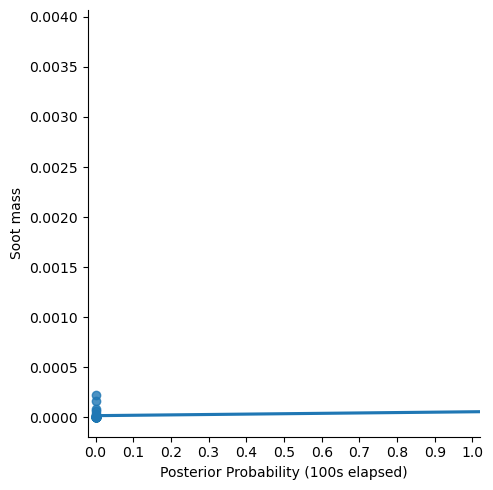

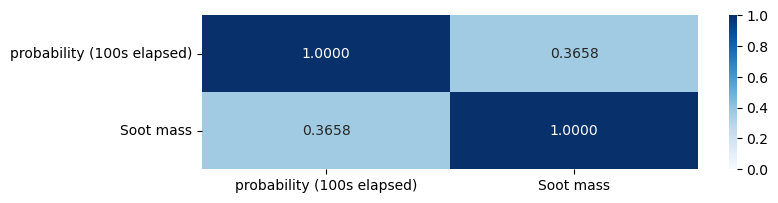

In [5]:
# 100s elapsed
sd_df_1st = sd_df[['Node', '100s']]
sd_df_1st = sd_df_1st.rename(columns = {'100s':'Soot mass'})

df_1st=pd.merge(first_slice, sd_df_1st)
#set_1 = set(df_1st[(df_1st['probability (100s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_1st[(df_1st['Soot mass'] == 0)].index.tolist())
#df_1st_index = list((set_1 | set_2))
#df_1st.drop(df_1st_index, inplace=True)

g1= sns.lmplot(data=df_1st, x='probability (100s elapsed)', y='Soot mass', ci=None)
g1=(g1.set_axis_labels("Posterior Probability (100s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_1st_corr=df_1st[['probability (100s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_1st_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

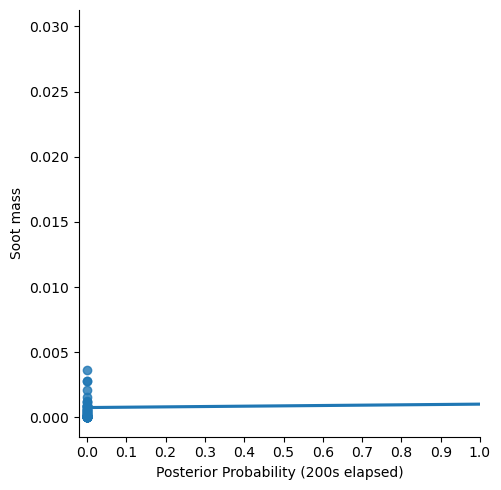

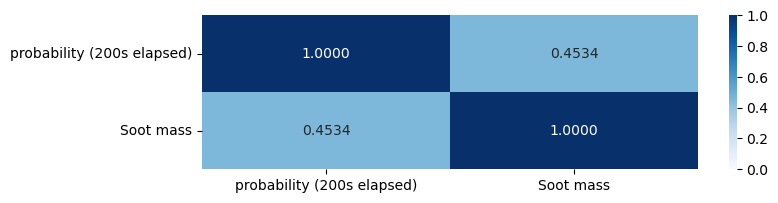

In [6]:
# 200s elapsed
sd_df_2nd = sd_df[['Node', '200s']]
sd_df_2nd = sd_df_2nd.rename(columns = {'200s':'Soot mass'})

df_2nd=pd.merge(second_slice, sd_df_2nd)
#set_1 = set(df_2nd[(df_2nd['probability (200s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_2nd[(df_2nd['Soot mass'] == 0)].index.tolist())
#df_2nd_index = list((set_1 | set_2))
#df_2nd.drop(df_2nd_index, inplace=True)

g2= sns.lmplot(data=df_2nd, x='probability (200s elapsed)', y='Soot mass', ci=None)
g2=(g2.set_axis_labels("Posterior Probability (200s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.0), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_2nd_corr=df_2nd[['probability (200s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_2nd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

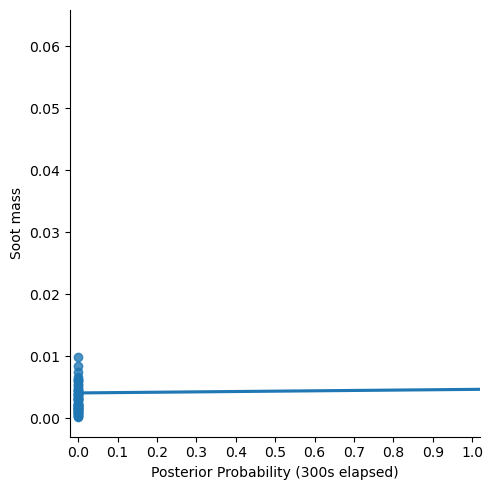

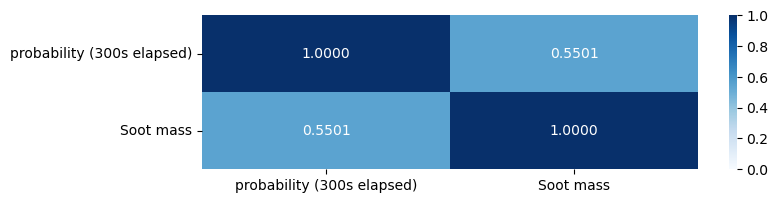

In [7]:
# 300s elapsed
sd_df_3rd = sd_df[['Node', '300s']]
sd_df_3rd = sd_df_3rd.rename(columns = {'300s':'Soot mass'})

df_3rd=pd.merge(third_slice, sd_df_3rd)
#set_1 = set(df_3rd[(df_3rd['probability (300s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_3rd[(df_3rd['Soot mass'] == 0)].index.tolist())
#df_3rd_index = list((set_1 | set_2))
#df_3rd.drop(df_3rd_index, inplace=True)

g3= sns.lmplot(data=df_3rd, x='probability (300s elapsed)', y='Soot mass', ci=None)
g3=(g3.set_axis_labels("Posterior Probability (300s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_3rd_corr=df_3rd[['probability (300s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_3rd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

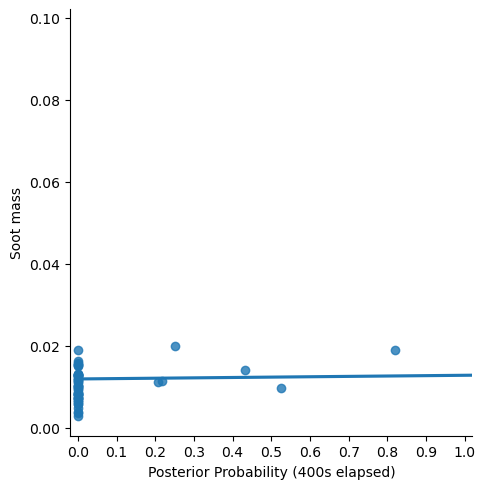

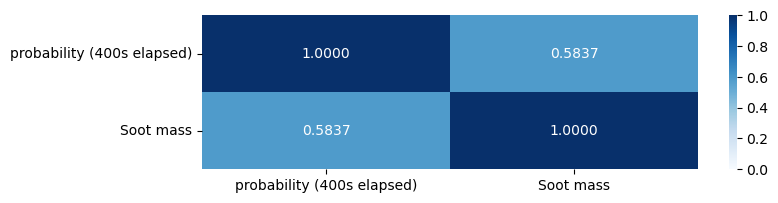

In [8]:
# 400s elapsed
sd_df_4th = sd_df[['Node', '400s']]
sd_df_4th = sd_df_4th.rename(columns = {'400s':'Soot mass'})

df_4th=pd.merge(fourth_slice, sd_df_4th)
#set_1 = set(df_4th[(df_4th['probability (400s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_4th[(df_4th['Soot mass'] == 0)].index.tolist())
#df_4th_index = list((set_1 | set_2))
#df_4th.drop(df_4th_index, inplace=True)

g4= sns.lmplot(data=df_4th, x='probability (400s elapsed)', y='Soot mass', ci=None)
g4=(g4.set_axis_labels("Posterior Probability (400s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_4th_corr=df_4th[['probability (400s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_4th_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

#### pearson & p-value 검정

In [9]:
p_df_1st = df_1st.dropna()
p_df_1st['probability (100s elapsed)'].values
p_df_1st['Soot mass'].values

p_df_2nd = df_2nd.dropna()
p_df_2nd['probability (200s elapsed)'].values
p_df_2nd['Soot mass'].values

p_df_3rd = df_3rd.dropna()
p_df_3rd['probability (300s elapsed)'].values
p_df_3rd['Soot mass'].values

p_df_4th = df_4th.dropna()
p_df_4th['probability (400s elapsed)'].values
p_df_4th['Soot mass'].values

print(stats.pearsonr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.pearsonr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.pearsonr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.pearsonr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

PearsonRResult(statistic=0.7021992639096556, pvalue=7.127724583203254e-11)
PearsonRResult(statistic=0.49051566107243344, pvalue=3.3540544299391814e-05)
PearsonRResult(statistic=0.389714209657402, pvalue=0.0013324145069809272)
PearsonRResult(statistic=0.32784736582698304, pvalue=0.007675412505522542)


#### spearman & pvalue 상관계수

In [10]:
print(stats.spearmanr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.spearmanr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.spearmanr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.spearmanr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

SignificanceResult(statistic=0.36580456746050516, pvalue=0.002730180137882753)
SignificanceResult(statistic=0.45344701995038206, pvalue=0.00014864502818095335)
SignificanceResult(statistic=0.5501011180431719, pvalue=2.0668368006923054e-06)
SignificanceResult(statistic=0.5837197615961801, pvalue=3.3323794872779157e-07)


In [11]:
import math
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error

pred1_value = p_df_1st['probability (100s elapsed)'].values
true1_value = p_df_1st['Soot mass'].values
rmse1 = math.sqrt(mean_squared_error(true1_value,pred1_value))
print('rmse1: %f', rmse1)

pred2_value = p_df_2nd['probability (200s elapsed)'].values
true2_value = p_df_2nd['Soot mass'].values
rmse2 = math.sqrt(mean_squared_error(true2_value,pred2_value))
print('rmse2: %f',rmse2)

pred3_value = p_df_3rd['probability (300s elapsed)'].values
true3_value = p_df_3rd['Soot mass'].values
rmse3 = math.sqrt(mean_squared_error(true3_value,pred3_value))
print('rmse3: %f', rmse3)

pred4_value = p_df_4th['probability (400s elapsed)'].values
true4_value = p_df_4th['Soot mass'].values
rmse4 = math.sqrt(mean_squared_error(true4_value,pred4_value))
print('rmse4: %f', rmse4)

rmse1: %f 8.82152024599707
rmse2: %f 7.181088742303169
rmse3: %f 5.582570408315543
rmse4: %f 4.550944889394824


FFT 그래프 간의 상관관계: 0.8234172383176697


C:\Users\lablj\AppData\Local\Temp\ipykernel_10416\2797547363.py:24: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100, 10)


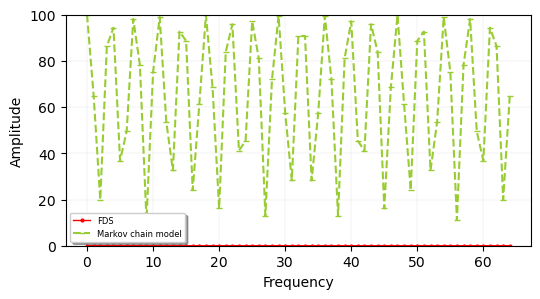

FFT 그래프 간의 상관관계: 0.5755012321766804


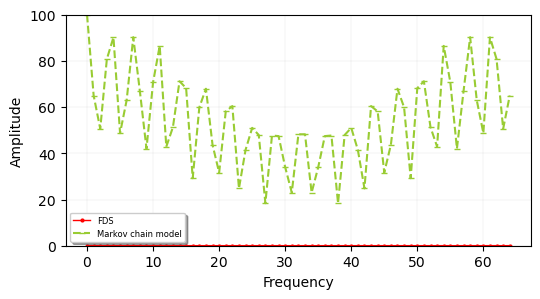

FFT 그래프 간의 상관관계: 0.4750534062212479


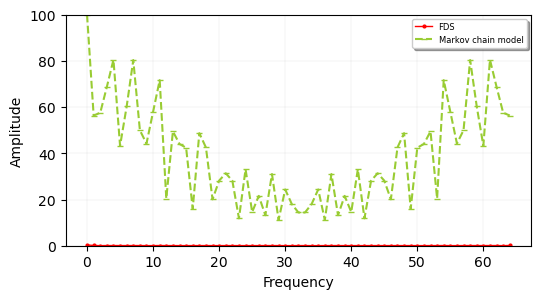

FFT 그래프 간의 상관관계: 0.4971770103880741


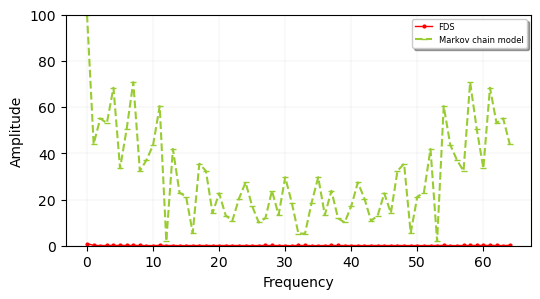

In [12]:
### 기타

import numpy as np

def fft_calculation(predict, observe, plot=True):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
    if plot == True:
        plt.figure(figsize=(6,3))
        plt.plot(np.abs(observed_fft), label='FDS', color = '#ff0000', marker='o', markersize=2, linewidth=1)
        plt.plot(np.abs(predicted_fft), label='Markov chain model', color='#99CC33', linestyle='--', marker='_', markersize=5, linewidth=1.5)
        plt.legend(shadow=True, prop={'size':6})
        plt.grid(True, lw=0.1)
        #plt.title('FFT result comparison')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.ylim(0, 100, 10)
        plt.show()

        
fft_calculation(pred1_value,true1_value)
fft_calculation(pred2_value,true2_value)
fft_calculation(pred3_value,true3_value)
fft_calculation(pred4_value,true4_value)